In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp

In [59]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
166,tt2883512,11000000,45967935,Chef,Jon Favreau|John Leguizamo|Bobby Cannavale|Emj...,Jon Favreau,Starting from scratch never tasted so good,A chef who loses his restaurant job starts up ...,115,Comedy,Open Road Films|Aldamisa Entertainment|Kilburn...,5/8/2014,7.2,2014
1192,tt1411250,38000000,98337295,Riddick,Vin Diesel|Karl Urban|Katee Sackhoff|Jordi Mol...,David Twohy,Survival Is His Revenge,Betrayed by his own kind and left for dead on ...,119,Science Fiction|Action|Thriller,One Race Productions|Radar Pictures|Riddick Ca...,9/2/2013,6.2,2013
1678,tt0486655,70000000,135560026,Stardust,Claire Danes|Charlie Cox|Michelle Pfeiffer|Rob...,Matthew Vaughn,This Summer A Star Falls. The Chase Begins.,In a countryside town bordering on a magical l...,127,Adventure|Fantasy|Romance|Family,Paramount Pictures|Ingenious Film Partners|Di ...,8/9/2007,7.0,2007
270,tt1028532,16000000,47801389,Hachi: A Dog's Tale,Richard Gere|Joan Allen|Jason Alexander|Cary-H...,Lasse HallstrÃ¶m,"A true story of faith, devotion and undying love.",A drama based on the true story of a college p...,93,Drama|Family,Grand Army Entertainment|Scion Films|Inferno D...,6/13/2009,7.7,2009
276,tt0448011,50000000,155446362,Knowing,Nicolas Cage|Rose Byrne|Chandler Canterbury|Be...,Alex Proyas,Knowing is everything...,A teacher opens a time capsule that has been d...,121,Action|Adventure|Drama|Mystery|Science Fiction,Summit Entertainment|Mystery Clock Cinema|Esca...,3/19/2009,5.7,2009


In [60]:
#удаляем столбцы, не участвующие в рассмотрении
data.drop(['imdb_id', 'original_title', 'tagline','overview','production_companies','release_date'], inplace=True, axis=1)

In [61]:
#нформация  о содержимом dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1889 non-null   int64  
 1   revenue       1889 non-null   int64  
 2   cast          1889 non-null   object 
 3   director      1889 non-null   object 
 4   runtime       1889 non-null   int64  
 5   genres        1889 non-null   object 
 6   vote_average  1889 non-null   float64
 7   release_year  1889 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.2+ KB


Пропусков нет

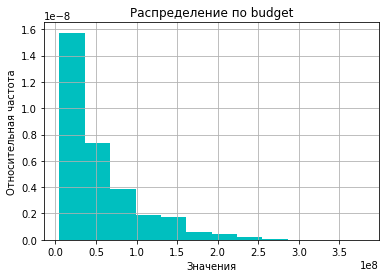

DescribeResult(nobs=1889, minmax=(5000000, 380000000), mean=54310829.63843303, variance=2360716727358396.0, skewness=1.7870280380881545, kurtosis=3.7592338567631245)
count    1.889000e+03
mean     5.431083e+07
std      4.858721e+07
min      5.000000e+06
25%      2.000000e+07
50%      3.800000e+07
75%      7.200000e+07
max      3.800000e+08
Name: budget, dtype: float64


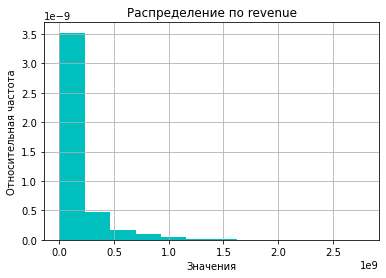

DescribeResult(nobs=1889, minmax=(2033165, 2781505847), mean=155365321.08417153, variance=4.6083128677207624e+16, skewness=3.6188497382044975, kurtosis=21.937875115435553)
count    1.889000e+03
mean     1.553653e+08
std      2.146698e+08
min      2.033165e+06
25%      3.456058e+07
50%      8.361541e+07
75%      1.782626e+08
max      2.781506e+09
Name: revenue, dtype: float64


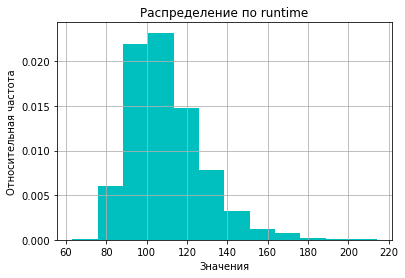

DescribeResult(nobs=1889, minmax=(63, 214), mean=109.6585494970884, variance=324.6137523440795, skewness=1.0590050445751242, kurtosis=1.8540275951971426)
count    1889.000000
mean      109.658549
std        18.017041
min        63.000000
25%        97.000000
50%       107.000000
75%       120.000000
max       214.000000
Name: runtime, dtype: float64


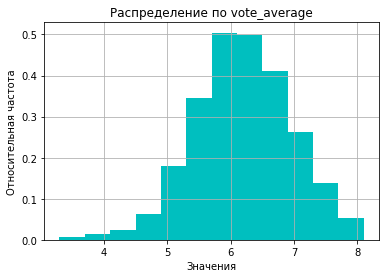

DescribeResult(nobs=1889, minmax=(3.3, 8.1), mean=6.140762308099524, variance=0.584862977900602, skewness=-0.18497225823357452, kurtosis=0.19670363783685474)
count    1889.000000
mean        6.140762
std         0.764763
min         3.300000
25%         5.600000
50%         6.100000
75%         6.600000
max         8.100000
Name: vote_average, dtype: float64


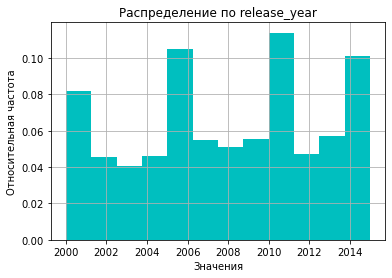

DescribeResult(nobs=1889, minmax=(2000, 2015), mean=2007.860772895712, variance=19.97054198706158, skewness=-0.09843054590356724, kurtosis=-1.129543265814281)
count    1889.000000
mean     2007.860773
std         4.468841
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name: release_year, dtype: float64


In [62]:
# построение гистограмм с выводом описательной характеристики
quantitative_variables = ['budget', 'revenue', 'runtime', 'vote_average', 'release_year']
for variable in quantitative_variables:
    plt.hist(data[variable], 12, density=1, facecolor='c')
    plt.grid(True)
    plt.xlabel("Значения")
    plt.ylabel("Относительная частота")
    plt.title(f'Распределение по {variable}')
    plt.savefig(f'{variable}.png', bbox_inches='tight')
    plt.show()
    print(sp.describe(data[variable], ddof=1, bias=False))
    print(data[variable].describe())

In [63]:
# избавляемся от "|" в столбцах director, cast, genres
data2 = data
data2['director'] = data.director.apply(lambda x: str(x).split('|'))
data2['cast'] = data.cast.apply(lambda x: str(x).split('|'))
data2['genres'] = data.genres.apply(lambda x: str(x).split('|'))
data3 = data2.explode('director')
data4 = data3.explode('cast')
data5 = data4.explode('genres')
data5


,budget,revenue,cast,director,runtime,genres,vote_average,release_year
0,150000000,1513528810,Chris Pratt,Colin Trevorrow,124,Action,6.5,2015
0,150000000,1513528810,Chris Pratt,Colin Trevorrow,124,Adventure,6.5,2015
0,150000000,1513528810,Chris Pratt,Colin Trevorrow,124,Science Fiction,6.5,2015
0,150000000,1513528810,Chris Pratt,Colin Trevorrow,124,Thriller,6.5,2015
0,150000000,1513528810,Bryce Dallas Howard,Colin Trevorrow,124,Action,6.5,2015
...,...,...,...,...,...,...,...,...
1888,15000000,5217498,Susan Ward,Mary Lambert,105,Thriller,5.2,2000
1888,15000000,5217498,Lori Heuring,Mary Lambert,105,Thriller,5.2,2000
1888,15000000,5217498,Matthew Settle,Mary Lambert,105,Thriller,5.2,2000
1888,15000000,5217498,Nathan Bexton,Mary Lambert,105,Thriller,5.2,2000


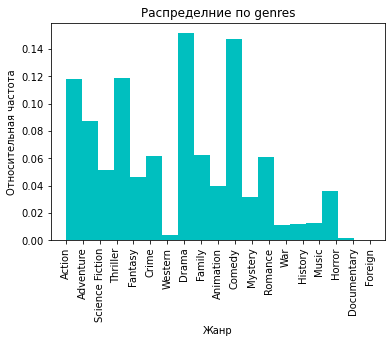

In [64]:
# построение гистограммы распредления жанров
plt.hist(data5.genres, bins=19, facecolor='c', density=1)
plt.xlabel("Жанр")
plt.ylabel("Относительная частота")
plt.title("Распределние по genres")
plt.xticks(rotation='vertical')
plt.savefig('genres.png', bbox_inches='tight')


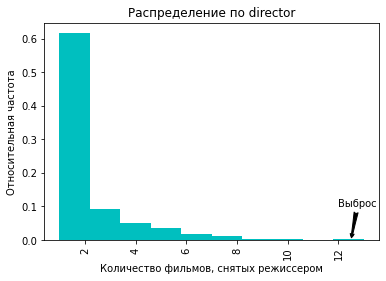

In [65]:
# гистограмма, показывающая, сколько фильмов сняли режиссеры в период с 2000 по 2015
data3 = data2.explode('director')
plt.hist(data3.director.value_counts(), facecolor='c', density=1)
plt.annotate('Выброс', xy=(12.5, 0.001), xytext=(12 ,0.1), arrowprops=dict(facecolor='black', arrowstyle='fancy'))
plt.xlabel("Количество фильмов, снятых режиссером")
plt.ylabel("Относительная частота")
plt.title("Распределение по director")
plt.xticks(rotation='vertical')
plt.savefig('film_director.png', bbox_inches='tight')

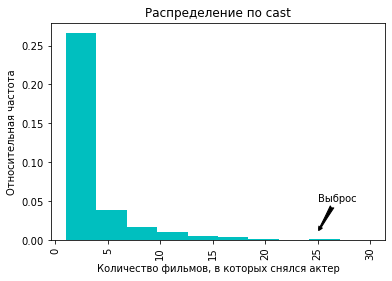

In [66]:
# гистограмма, показывающая в скольких фильмах снялись актеры в период с 2000 по 2015
plt.hist(data4.cast.value_counts(), facecolor='c', density=1)
plt.annotate('Выброс', xy=(25, 0.01), xytext=(25 ,0.05), arrowprops=dict(facecolor='black', arrowstyle='fancy'))
plt.xlabel("Количество фильмов, в которых снялся актер")
plt.ylabel("Относительная частота")
plt.title("Распределение по cast")
plt.xticks(rotation='vertical')
plt.savefig('film_cast.png', bbox_inches='tight')
plt.show()

In [67]:
# функция для построения диаграмм Бокса-Уискера 
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='vote_average', 
                data=data5.loc[data5.loc[:, column].isin(data5.loc[:, column].value_counts().index[:10])],
               ax=ax, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
    plt.xticks(rotation=45)
    ax.set_title(f'Распределение vote average по {column} ')
    plt.savefig(f'boxplot_{column}_vote_average', bbox_inches='tight')

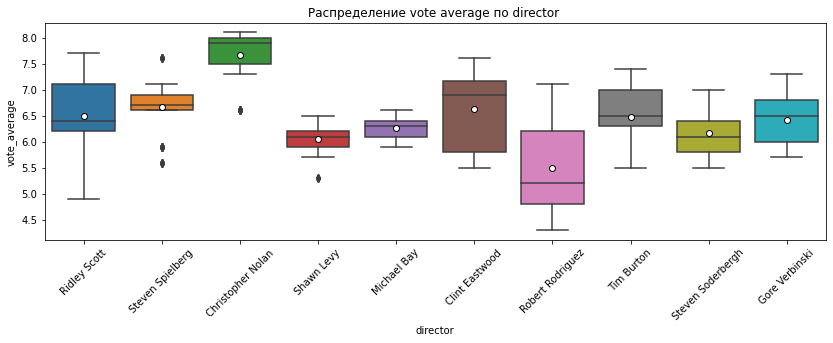

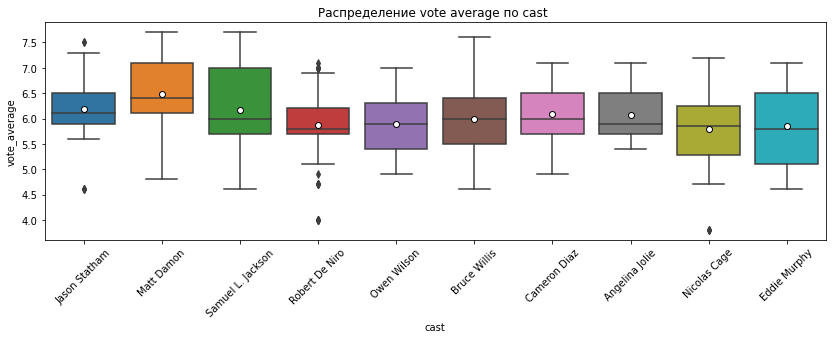

In [68]:
for col in ['director', 'cast']:
    get_boxplot(col)
    
    
    

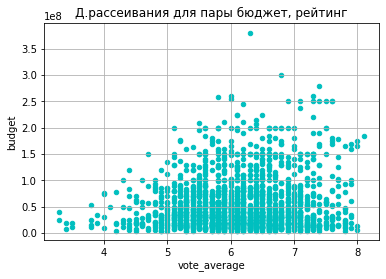

In [69]:
# построение диаграммы рассеивания для переменных budget и vote_average
data.plot(x = 'vote_average',
          y = 'budget',
          kind = 'scatter',
          grid = True,
          title = 'Д.рассеивания для пары бюджет, рейтинг',
          color='c')
plt.savefig("scatter_budget_vote_average")

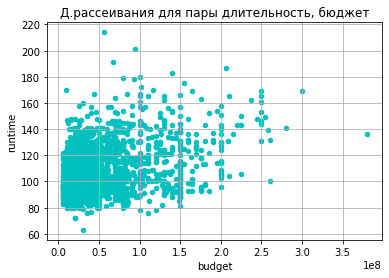

In [70]:
# построение диаграммы рассеивания для переменных budget и runtime
data.plot(x = 'budget',
          y = 'runtime',
          kind = 'scatter',
          grid = True,
          title = 'Д.рассеивания для пары длительность, бюджет',
          color='c')
plt.savefig("scatter_runtime_budget")

In [82]:
df = data4[data4.director.isin(data4.loc[:, "director"].value_counts().index[:12])].copy()
 
df2 = df[df.cast.isin(df.loc[:, "cast"].value_counts().index[:10])].copy()
 
df3 = pd.crosstab(df2.director, df2.cast)
df3.head(10)

cast,Ben Stiller,Carla Gugino,George Clooney,Helena Bonham Carter,Jim Carrey,Johnny Depp,Matt Damon,Owen Wilson,Russell Crowe,Tom Hanks
director,,,,,,,,,,
Bobby Farrelly,1,0,0,0,2,0,1,1,0,0
Brett Ratner,1,0,0,0,0,0,0,0,0,0
Clint Eastwood,0,0,0,0,0,0,2,0,0,0
Peter Farrelly,1,0,0,0,2,0,1,1,0,0
Ridley Scott,0,0,0,0,0,0,1,0,5,0
Robert Rodriguez,0,3,0,0,0,1,0,0,0,0
Ron Howard,0,0,0,0,1,0,0,0,2,2
Shawn Levy,3,1,0,0,0,0,0,3,0,0
Steven Soderbergh,0,0,5,0,0,0,5,0,0,0


In [83]:
# пользуемся критерием хи-квадрат для определния наличия статистической связи 
table = np.array([[1,0,0,0,2,0,1,1,0,0], 
         [0,4,0,0,0,0,2,0,0,0], 
         [1,0,0,0,2,0,1,1,0,0], 
         [0,0,0,0,0,0,1,0,5,0],
         [0,0,0,0,0,1,0,0,0,0], 
         [0,0,0,0,1,0,0,0,2,2],
         [3,0,0,0,0,0,0,3,0,0],
         [0,0,5,0,0,0,5,0,0,0],
         [0,0,0,0,0,0,0,0,0,3],
         [0,0,0,7,0,5,0,0,0,0]])
 
chi2, prob, df, expected = sp.chi2_contingency(table)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, df, prob))
print(expected)

test Statistics: 249.37801587301587
degrees of freedom: 81
p-value: 4.868218004779004e-19

[[0.42372881 0.33898305 0.42372881 0.59322034 0.42372881 0.50847458
  0.84745763 0.42372881 0.59322034 0.42372881]
 [0.50847458 0.40677966 0.50847458 0.71186441 0.50847458 0.61016949
  1.01694915 0.50847458 0.71186441 0.50847458]
 [0.42372881 0.33898305 0.42372881 0.59322034 0.42372881 0.50847458
  0.84745763 0.42372881 0.59322034 0.42372881]
 [0.50847458 0.40677966 0.50847458 0.71186441 0.50847458 0.61016949
  1.01694915 0.50847458 0.71186441 0.50847458]
 [0.08474576 0.06779661 0.08474576 0.11864407 0.08474576 0.10169492
  0.16949153 0.08474576 0.11864407 0.08474576]
 [0.42372881 0.33898305 0.42372881 0.59322034 0.42372881 0.50847458
  0.84745763 0.42372881 0.59322034 0.42372881]
 [0.50847458 0.40677966 0.50847458 0.71186441 0.50847458 0.61016949
  1.01694915 0.50847458 0.71186441 0.50847458]
 [0.84745763 0.6779661  0.84745763 1.18644068 0.84745763 1.01694915
  1.69491525 0.84745763 1.18644068 0

In [32]:
# выычисление коэффициента Крамера
def cramers_stat(confusion_matrix):
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

result = cramers_stat(table)
result

0.685301720391669

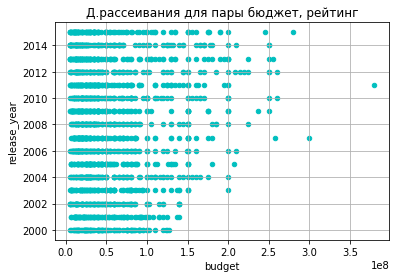

In [33]:
# построение диаграммы рассеивания для переменных budget и release_year
data.plot(x = 'budget',
          y = 'release_year',
          kind = 'scatter',
          grid = True,
          title = 'Д.рассеивания для пары бюджет, рейтинг',
          color='c')
plt.savefig("scatter_budget_release_year.png")

In [34]:
# вычисление коэффициентов корреляции Пирсона, Спирмена и тау Кендалла
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
print(pearsonr(data.budget, data.runtime))
print(spearmanr(data.budget, data.runtime))
print(kendalltau(data.budget, data.runtime))
print('\n')
print(pearsonr(data.budget, data.vote_average))
print(spearmanr(data.budget, data.vote_average))
print(kendalltau(data.budget, data.vote_average))

(0.3435165786374265, 1.88046922820392e-53)
SpearmanrResult(correlation=0.28000778868422127, pvalue=2.2805639409483104e-35)
KendalltauResult(correlation=0.19462683310002016, pvalue=1.534192900834597e-35)


(0.11370531698521365, 7.2428188312258e-07)
SpearmanrResult(correlation=0.03457983758214548, pvalue=0.13299768864567751)
KendalltauResult(correlation=0.02426198810981799, pvalue=0.1244101248009896)


In [35]:
# поиск корреляци между пременными budget и release_year
np.corrcoef(data.budget, data.release_year)

array([[1.      , 0.066325],
       [0.066325, 1.      ]])